In [4]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from mppi import Parsers as P

# Tutorial of the PwParser class

This tutorial describes the usage of the class PwParser of mppi used to extract information for the XML output file data-file-schema produced
by pw.

## Parse of a scf output file

The class is initialized by specifying the name of the xml file including its relative path 

In [24]:
results = P.PwParser('IO_files/si_scf.save/data-file-schema.xml')

Parse file : IO_files/si_scf.save/data-file-schema.xml


When the object is initialized several attributes are set, for instance

In [25]:
results.units

'Hartree atomic units'

In [26]:
results.atomic_positions

[['Si', [-1.2875, 1.2875, 1.2875]], ['Si', [1.2875, -1.2875, -1.2875]]]

In [27]:
results.atomic_species

{'Si': ['2.808600000000000e1', 'Si.pbe-mt_fhi.UPF']}

In [28]:
results.nkpoints

6

In [29]:
results.nbands

4

In [30]:
results.kpoints

[[0.0, 0.0, 0.0],
 [-0.3333333333333333, 0.3333333333333333, -0.3333333333333333],
 [0.0, 0.6666666666666666, 0.0],
 [0.6666666666666669, -5.551115123125783e-17, 0.6666666666666669],
 [-0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [-0.6666666666666669, 0.6666666666666669, 0.0]]

Arrays with the energy (in Hartree) for all the kpoints and for all the bands

In [31]:
results.evals

array([[-0.20362013,  0.23008746,  0.23009597,  0.23009597],
       [-0.15364325,  0.03525018,  0.19221198,  0.19221959],
       [-0.13371509,  0.0489887 ,  0.13980064,  0.1398055 ],
       [-0.08408231, -0.01551476,  0.06707819,  0.15095046],
       [-0.15364376,  0.03524954,  0.19221929,  0.19221929],
       [-0.08408382, -0.01551278,  0.0670755 ,  0.15095544]])

In [32]:
results.fermi

0.2300959736436337

In [33]:
results.energy

-7.828160394451467

There are also some get methods to extract relevant quantities and perform simple operations, like
the units conversion, for instance

In [34]:
results.get_fermi()

6.261230355862744

provides the fermi energy in eV.

The class contain a methods that extract the ks dos

In [37]:
Dos = results.Dos()
energy = Dos[:,0]
dos = Dos[:,1]

In [38]:
import matplotlib.pyplot as plt

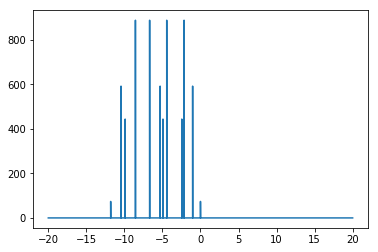

In [39]:
plt.plot(energy,dos)

...broad still to be tested....

## Parse of a nscf output file

The parsing of the nscf (or other type) of w calculation are performed in the same way as the scf ones.
In these cases some attriubte are not computed by pw, for instance self.energy is equal to zero

In [40]:
results = P.PwParser('IO_files/gaas_bands.save/data-file-schema.xml')

Parse file : IO_files/gaas_bands.save/data-file-schema.xml


The presence of empty bands can be checked by looking at the occupations attribute, for instance

In [41]:
results.occupations[0]

array([1., 1., 1., 1., 0., 0., 0., 0.])

If the kpoints sampling has been performed along a path we can plot the band structure

In [42]:
kpath = results.get_kpath()
bands = results.get_bands()

(-4, 4)

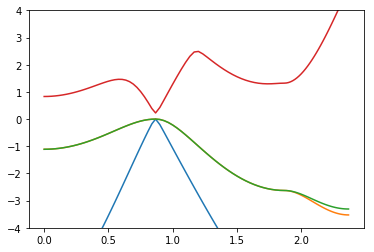

In [43]:
for b in bands[1:5]:
    plt.plot(kpath,b)
plt.ylim(-4,4)